In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from shapely.geometry import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from visualenvironment import VisualEnvironment

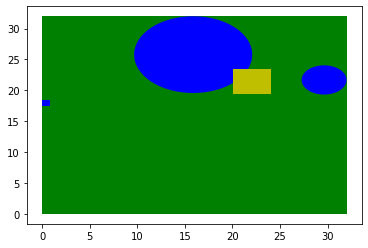

14.0


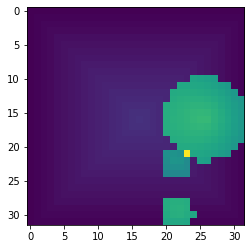

In [24]:
env1 = VisualEnvironment()
env1.plot_geometry()
print (env1.value_for_position([0,0]))
env1.plot_data()

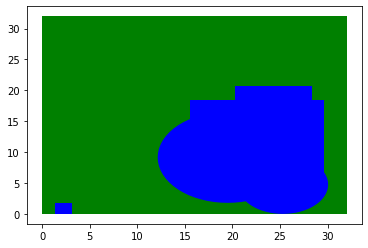

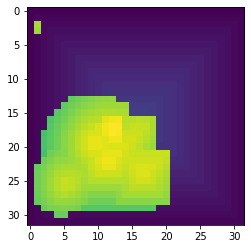

In [25]:
env2 = VisualEnvironment(includeRobot=False)
env2.plot_geometry()
env2.plot_data()

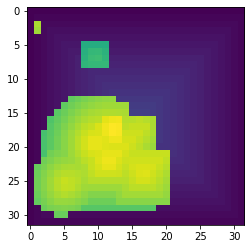

Environment 0
Control [ 1.63078178 -0.65610207]
Max: 95.03003983066351
Min: 14.0
Number of changing elements (16,)


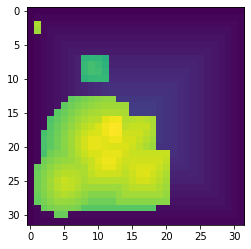

Environment 1
Control [ 1.699493   -0.54882353]
Max: 95.03003983066351
Min: 14.0
Number of changing elements (16,)


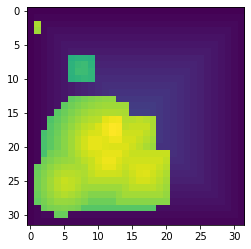

Environment 2
Control [ 0.35011004 -1.93504146]
Max: 95.03003983066351
Min: 14.0
Number of changing elements (16,)


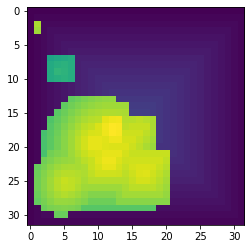

Environment 3
Control [ 0.29463442 -2.97600308]
Max: 95.03003983066351
Min: 14.0
Number of changing elements (16,)


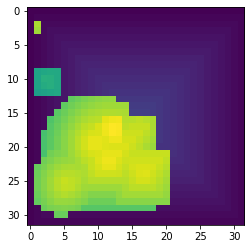

Environment 4
Control [ 1.27758172 -1.89375141]
Max: 95.03003983066351
Min: 14.0
Number of changing elements (16,)


In [26]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

envs, controls = env2.generate_trajectory(length=5)
for i in range(len(envs)):
#     plt.subplot(3, 4, i+1)
    envs[i].build_data()
    fig = plt.figure()
    plt.imshow(envs[i].data)
    plt.show()
    print ('Environment {}'.format(i))
    print ('Control {}'.format(controls[i]))
    print ('Max: {}'.format(np.max(envs[i].data)))
    print ('Min: {}'.format(np.min(envs[i].data)))
    diff = envs[i].data - env2.data
    print ('Number of changing elements {}'.format(diff[diff > 0].shape))

np.set_printoptions(**opt)

In [27]:
# data sample = x_t, x_t+1, x_empty, u
# problem sample = x_start, x_goal, x_empty
def generate_data(no_of_trajectories):
    traj_length = 11
    x_size = 32*32
    u_size = 2
    problem_size = 3*x_size
    data_size = problem_size + u_size
    problems = np.zeros((no_of_trajectories, problem_size))
    data = np.zeros((no_of_trajectories*(traj_length-1), data_size))
    for i in range(no_of_trajectories):
        empty_env = VisualEnvironment(includeRobot=False)
        empty_env.build_data()
        x_empty = empty_env.data.reshape(-1)
        envs, controls = empty_env.generate_trajectory(length=traj_length)
        for j in range(traj_length):
            envs[j].build_data()
        x_start = envs[0].data.reshape(-1)
        x_goal = envs[traj_length-1].data.reshape(-1)
        problems[i,:] = np.concatenate((x_start, x_goal, x_empty))
        for j in range(traj_length-1):
            data_sample = np.concatenate((envs[j].data.reshape(-1), envs[j+1].data.reshape(-1), x_empty, controls[j+1]))
            data[i*(traj_length-1)+j,:] = data_sample
    return problems, data

In [28]:
problem_sample, data_samples = generate_data(3)

In [29]:
print (problem_sample.shape)
print (data_samples.shape)

(3, 3072)
(30, 3074)


In [ ]:
# training
problems, data = generate_data(1000)
np.savetxt('problems_train.csv', problems, fmt="%5.1f", delimiter=',')
np.savetxt('dynamics_train.csv', data, fmt="%5.1f", delimiter=',')
print ('Training data generated')

# test
problems, data = generate_data(100)
np.savetxt('problems_test.csv', problems, fmt="%5.1f", delimiter=',')
np.savetxt('dynamics_test.csv', data, fmt="%5.1f", delimiter=',')
print ('Test data generated')

# samples for RRT
problems, data = generate_data(500)
np.savetxt('problems_samples.csv', problems, fmt="%5.1f", delimiter=',')
np.savetxt('dynamics_samples.csv', data, fmt="%5.1f", delimiter=',')
print ('Samples data generated')

In [ ]:
#### Additional exploratory code for saving matplotlib figure as numpy array...

In [44]:
print (fig)

Figure(432x288)


In [ ]:
fig.canvas.draw()
w,h = fig.canvas.get_width_height()
print ('{} x {}'.format(w, h))
buf = fig.canvas.tostring_argb()
print (len(buf))
print (buf[0:10])
buf_arr = np.frombuffer(buf, dtype=np.uint8)
print (buf_arr.shape)
print (buf_arr[0:10])

buf = fig.canvas.print_to_buffer()
print (buf)

In [36]:
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

In [38]:
fig_arr = fig2data(fig)
fig_arr.shape

/Users/pradeepkadubandi/.local/share/virtualenvs/LSBMP-L2RRT-AlqjJP_-/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


(432, 288, 4)

In [ ]:
# Exploratory code for playing with normal distribution 

[[7.09989678 7.17745381 7.25300792 ... 7.25300792 7.17745381 7.09989678]
 [7.17745381 7.25853003 7.33772349 ... 7.33772349 7.25853003 7.17745381]
 [7.25300792 7.33772349 7.42070762 ... 7.42070762 7.33772349 7.25300792]
 ...
 [7.25300792 7.33772349 7.42070762 ... 7.42070762 7.33772349 7.25300792]
 [7.17745381 7.25853003 7.33772349 ... 7.33772349 7.25853003 7.17745381]
 [7.09989678 7.17745381 7.25300792 ... 7.25300792 7.17745381 7.09989678]]
9.890122675365303
7.099896779598069


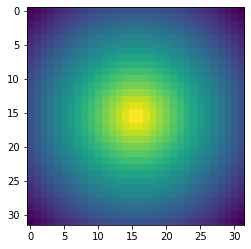

In [36]:
data = 5 * np.zeros((32,32), dtype=np.float)
center = np.array([15.5, 15.5])
var = 32
peak = 10
it = np.nditer(data, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    distance_squared = np.sum((center-it.multi_index) ** 2)  # Circular shape
    # distance_squared = np.max(np.abs(center-it.multi_index)) ** 2   # Square shape
    prob = np.exp(-distance_squared/(2*var)) # / np.sqrt(2 * np.pi * var)
    data[it.multi_index] += peak * prob
    it.iternext()
    
plt.imshow(data, cmap=default_cmap)
print (data)
print (np.max(data))
print (np.min(data))

In [ ]:
# Exploratory code for saving numpy arrays

In [36]:
a = np.random.randint(100, size=(3,4))
print (a)
np.savetxt('foo.csv', a, fmt="%5.1f", delimiter=',')
b = np.loadtxt('foo.csv', delimiter=',')
print (b.shape)
print (b)

[[76 36  4 97]
 [71 30 92 97]
 [ 8 10 44 29]]
(3, 4)
[[76. 36.  4. 97.]
 [71. 30. 92. 97.]
 [ 8. 10. 44. 29.]]
